В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов наиболее эффективно. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease). Она принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. Подробное описание признаков можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

# 1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


# 2.Подготовьте датасет к обучению моделей: a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data['FastingBS'].nunique(), data['FastingBS'].unique()

(2, array([0, 1]))

In [ ]:
data['HeartDisease'].nunique(), data['HeartDisease'].unique()

(2, array([0, 1]))

In [ ]:
categorials = list(data.dtypes[data.dtypes == object].index)
categorials

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
categorials_nunique = data[categorials].nunique()
categorials_nunique

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [ ]:
dummy_data = pd.get_dummies(data[categorials], columns=categorials)

In [ ]:
dummy_data.shape

(918, 14)

In [ ]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sex_F              918 non-null    uint8
 1   Sex_M              918 non-null    uint8
 2   ChestPainType_ASY  918 non-null    uint8
 3   ChestPainType_ATA  918 non-null    uint8
 4   ChestPainType_NAP  918 non-null    uint8
 5   ChestPainType_TA   918 non-null    uint8
 6   RestingECG_LVH     918 non-null    uint8
 7   RestingECG_Normal  918 non-null    uint8
 8   RestingECG_ST      918 non-null    uint8
 9   ExerciseAngina_N   918 non-null    uint8
 10  ExerciseAngina_Y   918 non-null    uint8
 11  ST_Slope_Down      918 non-null    uint8
 12  ST_Slope_Flat      918 non-null    uint8
 13  ST_Slope_Up        918 non-null    uint8
dtypes: uint8(14)
memory usage: 12.7 KB


In [ ]:
dummy_data[['Sex_F','Sex_M', 'ExerciseAngina_N', 'ExerciseAngina_Y']].head(1)

,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,0,1,1,0


In [ ]:
dummy_data=dummy_data.drop(['Sex_F', 'ExerciseAngina_N'], axis=1)

In [ ]:
dummy_data.head(1)

,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#отфильтруем непрерывные признаки
integer = [f for f in data if f not in (categorials + ['HeartDisease','FastingBS'])]

In [ ]:
integer

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
data_ = pd.concat([data[integer], dummy_data,data['FastingBS'],data['HeartDisease']], axis=1)
data_.head(1)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS,HeartDisease
0,40,140,289,172,0.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   MaxHR              918 non-null    int64  
 4   Oldpeak            918 non-null    float64
 5   Sex_M              918 non-null    uint8  
 6   ChestPainType_ASY  918 non-null    uint8  
 7   ChestPainType_ATA  918 non-null    uint8  
 8   ChestPainType_NAP  918 non-null    uint8  
 9   ChestPainType_TA   918 non-null    uint8  
 10  RestingECG_LVH     918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Down      918 non-null    uint8  
 15  ST_Slope_Flat      918 non-null    uint8  
 16  ST_Slope_Up        918 non

# 3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
X=data_.drop(columns='HeartDisease')

In [ ]:
y=data_['HeartDisease']

In [ ]:
y.value_counts() # смотрим сбалансированность данных

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    #stratify=y,
                                                    random_state=42)
X_train.shape, X_test.shape

((734, 18), (184, 18))

# 4.Обучите модель логистической регрессии с параметрами по умолчанию.

In [ ]:
from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression().fit(X_train, y_train)

# 5.Подсчитайте основные метрики модели. Используйте следующие метрики и функцию: cross_validate(…, cv=10, scoring=['accuracy','recall','precision','f1'])

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
metr=cross_validate(model, X_train, y_train, cv=10,scoring=['accuracy','recall','precision','f1'])

In [ ]:
df=pd.DataFrame(metr)

In [ ]:
df

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.050594,0.012326,0.932432,0.925000,0.948718,0.936709
1,0.047025,0.010417,0.878378,0.875000,0.897436,0.886076
2,0.048717,0.013859,0.891892,0.875000,0.921053,0.897436
3,0.077655,0.008926,0.851351,0.902439,0.840909,0.870588
4,0.045341,0.006366,0.863014,0.900000,0.857143,0.878049
5,0.021488,0.006137,0.890411,0.925000,0.880952,0.902439
6,0.022194,0.006077,0.767123,0.825000,0.767442,0.795181
7,0.021732,0.006028,0.876712,0.900000,0.878049,0.888889
8,0.021216,0.006132,0.890411,0.950000,0.863636,0.904762
9,0.030702,0.006143,0.821918,0.875000,0.813953,0.843373


Видно, что в метриках между сгибов в cross_validate есть значительные различия, это может указывать на чрезмерную подгонку к определенным сгибам.

In [ ]:
metr=df.agg('mean')
metr = pd.Series(metr, name='Validate_model')
df=pd.DataFrame(metr)
df

,Validate_model
fit_time,0.038666
score_time,0.008241
test_accuracy,0.866364
test_recall,0.895244
test_precision,0.866929
test_f1,0.880350


In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test, pred, output_dict=True)
df1 = pd.DataFrame(report)
df1[0:3]['macro avg'], df1[3:]['accuracy'] # используем макро-усреднение, важно распознавать все классы

(precision    0.859517
 recall       0.864971
 f1-score     0.861575
 Name: macro avg, dtype: float64, support    0.86413
 Name: accuracy, dtype: float64)

Средние значения валидационных метрик показывают результат чуть лучше, чем метрики тестовой выборки.

# 6.Оптимизируйте 3-4 параметра модели:

## a) Используйте GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = ({'C': np.linspace(0, 10, 5),              #обратная сила регуляризации
               'penalty': ['l1', 'l2', 'elasticnet', 'none'],     # штраф
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # алгоритм для использования в задаче оптимизации
              })

In [ ]:
param_grid = parameters
print(param_grid)

{'C': array([ 0. ,  2.5,  5. ,  7.5, 10. ]), 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


In [ ]:
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [ ]:
%%time
grid.fit(X_train, y_train)

CPU times: user 583 ms, sys: 40.5 ms, total: 623 ms
Wall time: 15.8 s


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 0. ,  2.5,  5. ,  7.5, 10. ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001017,0.000143,0.000000,0.000000,0.0,l1,newton-cg,"{'C': 0.0, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
1,0.001805,0.002513,0.000000,0.000000,0.0,l1,lbfgs,"{'C': 0.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
2,0.000896,0.000077,0.000000,0.000000,0.0,l1,liblinear,"{'C': 0.0, 'penalty': 'l1', 'solver': 'libline...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
3,0.001606,0.001598,0.000000,0.000000,0.0,l1,sag,"{'C': 0.0, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
4,0.001782,0.002732,0.000000,0.000000,0.0,l1,saga,"{'C': 0.0, 'penalty': 'l1', 'solver': 'saga'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.042208,0.004758,0.002678,0.000144,10.0,none,newton-cg,"{'C': 10.0, 'penalty': 'none', 'solver': 'newt...",0.918919,0.878378,...,0.864865,0.821918,0.876712,0.794521,0.876712,0.890411,0.835616,0.864994,0.035237,13
96,0.027936,0.001479,0.002920,0.000467,10.0,none,lbfgs,"{'C': 10.0, 'penalty': 'none', 'solver': 'lbfgs'}",0.932432,0.878378,...,0.864865,0.849315,0.876712,0.780822,0.863014,0.876712,0.849315,0.866346,0.036452,8
97,0.000974,0.000158,0.000000,0.000000,10.0,none,liblinear,"{'C': 10.0, 'penalty': 'none', 'solver': 'libl...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
98,0.028841,0.002345,0.002892,0.001223,10.0,none,sag,"{'C': 10.0, 'penalty': 'none', 'solver': 'sag'}",0.797297,0.824324,...,0.716216,0.712329,0.698630,0.712329,0.726027,0.808219,0.726027,0.749167,0.043957,25


In [ ]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.8704553868937429
{'C': 5.0, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=5.0, solver='liblinear')


In [ ]:
pd.DataFrame(grid.cv_results_).shape # обучалось 100 моделей

(100, 21)

## b) Используйте RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid_Random = RandomizedSearchCV(model, param_grid,cv=10, scoring='accuracy',random_state=42)

In [ ]:
grid_Random.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([ 0. ,  2.5,  5. ,  7.5, 10. ]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [ ]:
# Single best score achieved across all params (k)
print(grid_Random.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid_Random.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_Random.best_estimator_)

0.8649944465012958
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 5.0}
LogisticRegression(C=5.0, solver='newton-cg')


In [ ]:
pd.DataFrame(grid_Random.cv_results_).shape # обучалось 10 моделей

(10, 21)

## c) *Добавьте в п. 6b 2-5 моделей классификации и вариации их параметров.

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from tqdm import tqdm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models=[
      {'name':'Lr',"model": LogisticRegression(),
       'params':
              {'C':np.linspace(0, 10, 5),
                'penalty':['l1', 'l2', 'elasticnet', 'none'],
                'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }
      },
      {'name':'SVC',"model": SVC(),
       'params':
              {'C': np.linspace(0, 10, 5),
               'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
               'degree':[1,2,3,5]
               }
       },
      {'name':'RF',"model": RandomForestClassifier(random_state=42),
       'params':
              {'n_estimators':[10,25,50,100,150,200],
               'criterion':['gini', 'entropy'],
               'max_depth':[3,5,7,9,11],
               'min_samples_leaf':[1,2,3,5]
               }
       },
      {'name':'KNN',"model": KNeighborsClassifier(),
       'params':
              {'n_neighbors':list(range(1,30)),
               'weights': ['uniform', 'distance'],
               'p':[1,2,3],
               'metric':['euclidean', 'minkowski']
               }
       },
      {'name':'DT',"model": DecisionTreeClassifier(random_state=42),
       'params':
              {'criterion':['gini', 'entropy'],
               'max_depth':[3,5,7,9,11],
               'min_samples_split':[2,3,4,5,7,9],
               'min_samples_leaf':[1,2,3,5]
               }
       }
]

In [ ]:
%%time


res = []
for v in tqdm(models):
    res.append((v['name'], RandomizedSearchCV(v['model'], v['params'],cv=10, random_state=42).fit(X_train, y_train)))

100%|██████████| 5/5 [01:19<00:00, 15.95s/it]

CPU times: user 1min 20s, sys: 803 ms, total: 1min 21s
Wall time: 1min 19s


In [ ]:
for r in res:
    print(r[0], r[1].best_score_, r[1].best_params_)

Lr 0.8649944465012958 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 5.0}
SVC 0.8676971492039985 {'kernel': 'linear', 'degree': 5, 'C': 2.5}
RF 0.8718252499074417 {'n_estimators': 150, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'entropy'}
KNN 0.7286560533135875 {'weights': 'uniform', 'p': 2, 'n_neighbors': 9, 'metric': 'minkowski'}
DT 0.8404850055534986 {'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 3, 'criterion': 'entropy'}


Лучший результат у модели RandomForestClassifier

## d) Повторите п. 5 после каждого итогового изменения параметров.

### модель по п.6.а

In [ ]:
model_1=LogisticRegression(C=5.0,penalty='l2',solver='liblinear').fit(X_train, y_train)

In [ ]:
metr_1=cross_validate(model_1, X_train, y_train, cv=10,scoring=['accuracy','recall','precision','f1'])

In [ ]:
df_1=pd.DataFrame(metr_1)
df_1

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.007003,0.005146,0.932432,0.925000,0.948718,0.936709
1,0.004483,0.004256,0.878378,0.875000,0.897436,0.886076
2,0.004260,0.004211,0.891892,0.875000,0.921053,0.897436
3,0.004131,0.008831,0.864865,0.902439,0.860465,0.880952
4,0.006601,0.004424,0.849315,0.875000,0.853659,0.864198
5,0.004187,0.004203,0.890411,0.925000,0.880952,0.902439
6,0.003947,0.004175,0.794521,0.850000,0.790698,0.819277
7,0.004266,0.004236,0.876712,0.900000,0.878049,0.888889
8,0.004049,0.004883,0.890411,0.950000,0.863636,0.904762
9,0.005331,0.004330,0.835616,0.900000,0.818182,0.857143


Видно, что в метриках между сгибов в cross_validate есть значительные различия, это может указывать на чрезмерную подгонку к определенным сгибам.

In [ ]:
metr_1=df_1.agg('mean')
metr_1 = pd.Series(metr_1, name='Validate_model_1')
df_1=pd.DataFrame(metr_1)
df_1

,Validate_model_1
fit_time,0.004826
score_time,0.004870
test_accuracy,0.870455
test_recall,0.897744
test_precision,0.871285
test_f1,0.883788


In [ ]:
pred_1 = model_1.predict(X_test)

In [ ]:
report_1 = classification_report(y_test, pred_1, output_dict=True)
df1_1 = pd.DataFrame(report_1)
df1_1[0:3]['macro avg'], df1_1[3:]['accuracy'] # используем макро-усреднение, важно распознавать все классы

(precision    0.848810
 recall       0.855626
 f1-score     0.850932
 Name: macro avg, dtype: float64, support    0.853261
 Name: accuracy, dtype: float64)

Средние значения валидационных метрик показывают результат лучше, чем метрики тестовой выборки. Это указывает на переобучение модели.

### модель по п.6.b

In [ ]:
model_2=LogisticRegression(C=5.0,penalty='l2',solver='newton-cg').fit(X_train, y_train)

In [ ]:
metr_2=cross_validate(model_2, X_train, y_train, cv=10,scoring=['accuracy','recall','precision','f1'])
df_2=pd.DataFrame(metr_2)
df_2

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.056760,0.006348,0.918919,0.925000,0.925000,0.925000
1,0.041474,0.007237,0.878378,0.875000,0.897436,0.886076
2,0.041660,0.006234,0.891892,0.875000,0.921053,0.897436
3,0.036098,0.006292,0.864865,0.902439,0.860465,0.880952
4,0.042690,0.006260,0.821918,0.875000,0.813953,0.843373
5,0.036364,0.006234,0.876712,0.900000,0.878049,0.888889
6,0.037412,0.006168,0.794521,0.850000,0.790698,0.819277
7,0.036917,0.005825,0.876712,0.900000,0.878049,0.888889
8,0.034362,0.005532,0.890411,0.950000,0.863636,0.904762
9,0.040087,0.006446,0.835616,0.900000,0.818182,0.857143


Видно, что в метриках между сгибов в cross_validate есть значительные различия, это может указывать на чрезмерную подгонку к определенным сгибам.

In [ ]:
metr_2=df_2.agg('mean')
metr_2 = pd.Series(metr_2, name='Validate_model_2')
df_2=pd.DataFrame(metr_2)
df_2

,Validate_model_2
fit_time,0.040382
score_time,0.006258
test_accuracy,0.864994
test_recall,0.895244
test_precision,0.864652
test_f1,0.879180


In [ ]:
pred_2 = model_2.predict(X_test)

In [ ]:
report_2 = classification_report(y_test, pred_2, output_dict=True)
df1_2 = pd.DataFrame(report_2)
df1_2[0:3]['macro avg'], df1_2[3:]['accuracy'] # используем макро-усреднение, важно распознавать все классы

(precision    0.848810
 recall       0.855626
 f1-score     0.850932
 Name: macro avg, dtype: float64, support    0.853261
 Name: accuracy, dtype: float64)

Средние значения валидационных метрик показывают результат лучше, чем метрики тестовой выборки. Это указывает на переобучение модели.

### модель по п.6.с

In [ ]:
model_3=RandomForestClassifier(random_state=42,n_estimators=150, min_samples_leaf=1, max_depth=7, criterion='entropy').fit(X_train, y_train)

In [ ]:
metr_3=cross_validate(model_3, X_train, y_train, cv=10,scoring=['accuracy','recall','precision','f1'])
df_3=pd.DataFrame(metr_3)
df_3

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.251760,0.017321,0.878378,0.925000,0.860465,0.891566
1,0.245805,0.018099,0.891892,0.875000,0.921053,0.897436
2,0.260056,0.023937,0.905405,0.900000,0.923077,0.911392
3,0.250213,0.018622,0.891892,0.926829,0.883721,0.904762
4,0.242110,0.019094,0.849315,0.925000,0.822222,0.870588
5,0.241831,0.018104,0.890411,0.925000,0.880952,0.902439
6,0.244687,0.018540,0.808219,0.900000,0.782609,0.837209
7,0.253965,0.018932,0.876712,0.900000,0.878049,0.888889
8,0.250987,0.017555,0.876712,0.950000,0.844444,0.894118
9,0.238986,0.017612,0.849315,0.925000,0.822222,0.870588


В этом варианте в метриках между сгибов в cross_validate меньше различий по сравнению с предыдущими вариантами.

In [ ]:
metr_3=df_3.agg('mean')
metr_3 = pd.Series(metr_3, name='Validate_model_3')
df_3=pd.DataFrame(metr_3)
df_3

,Validate_model_3
fit_time,0.248040
score_time,0.018782
test_accuracy,0.871825
test_recall,0.915183
test_precision,0.861881
test_f1,0.886899


In [ ]:
pred_3 = model_3.predict(X_test)

In [ ]:
report_3 = classification_report(y_test, pred_3, output_dict=True)
df1_3 = pd.DataFrame(report_3)
df1_3[0:3]['macro avg'], df1_3[3:]['accuracy'] # используем макро-усреднение, важно распознавать все классы

(precision    0.882317
 recall       0.883663
 f1-score     0.882962
 Name: macro avg, dtype: float64, support    0.88587
 Name: accuracy, dtype: float64)

Средние значения валидационных метрик показывают результат чуть хуже, чем метрики тестовой выборки.

# Сформулируйте выводы по проделанной работе: a) Сравните метрики построенных моделей. b) *Сравните с полученными результатами в домашнем задании по теме «Ансамблирование».

## a) Сравните метрики построенных моделей.

In [ ]:
df_concat = pd.concat([df, df_1, df_2,df_3], axis=1)
test=pd.Series(df1[3:]['accuracy'], name='Test_model')
test=pd.DataFrame(test)
test_1=pd.Series(df1_1[3:]['accuracy'], name='Test_model_1')
test_1=pd.DataFrame(test_1)
test_2=pd.Series(df1_2[3:]['accuracy'], name='Test_model_2')
test_2=pd.DataFrame(test_2)
test_3=pd.Series(df1_3[3:]['accuracy'], name='Test_model_3')
test_3=pd.DataFrame(test_3)
test_concat = pd.concat([test, test_1, test_2,test_3], axis=1)
test_concat.rename(index={'support': 'accuracy'},inplace=True)

In [ ]:
df_concat

,Validate_model,Validate_model_1,Validate_model_2,Validate_model_3
fit_time,0.038666,0.004826,0.040382,0.248040
score_time,0.008241,0.004870,0.006258,0.018782
test_accuracy,0.866364,0.870455,0.864994,0.871825
test_recall,0.895244,0.897744,0.895244,0.915183
test_precision,0.866929,0.871285,0.864652,0.861881
test_f1,0.880350,0.883788,0.879180,0.886899


На мой взгляд, самые лучшие результаты у model_3:

 RandomForestClassifier ('n_estimators': 150, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'entropy')

In [ ]:
test_concat

,Test_model,Test_model_1,Test_model_2,Test_model_3
accuracy,0.86413,0.853261,0.853261,0.88587


## b) *Сравните с полученными результатами в домашнем задании по теме «Ансамблирование».

В предыдущем домашнем задании были получены следующие результаты:

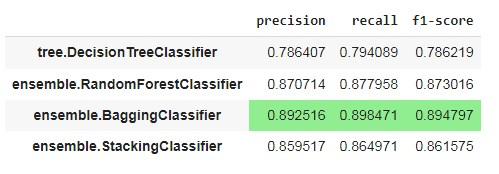

В тот раз модель RandomForestClassifier показала по качеству второй результат, у неё были следующие метрики:

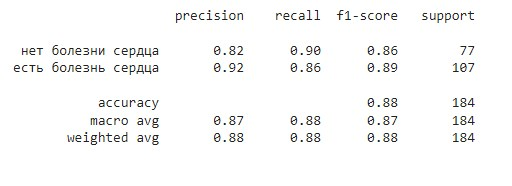

In [ ]:
df1_3 # метрики оптимизированной модели RandomForestClassifier

,0,1,accuracy,macro avg,weighted avg
precision,0.858974,0.905660,0.88587,0.882317,0.886123
recall,0.870130,0.897196,0.88587,0.883663,0.885870
f1-score,0.864516,0.901408,0.88587,0.882962,0.885970
support,77.000000,107.000000,0.88587,184.000000,184.000000


На оптимизированной модели стали лучше показатели precision и f1 (смотрим по macro) .

Для предыдущей модели использовались следующие параметры:
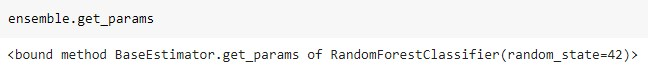

Остальные параметры были по умолчанию:

( n_estimators = 100 , * , критерий = 'gini ' , max_depth = None , min_samples_split = 2 , min_samples_leaf = 1 , min_weight_fraction_leaf = 0.0 , max_features = ' sqrt ', max_leaf_nodes = None , min_impurity_decrease = 0.0 , bootstrapoob_score = False , n_jobs = None , random_state = None , verbose = 0 , warm_start = False , class_weight = None , ccp_alpha = 0.0 , max_samples = None )

Сейчас были оптимизированы следующие параметры:

In [ ]:
model_3.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=150,
                       random_state=42)>